In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Models Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [ ]:
data.shape # Dimensions (rows, columns)

In [ ]:
data.head(10) # first 10 rows/records

In [5]:
data.tail(10) # last 10 rows/records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [4]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
if data.isnull().values.any():
    print('Unfortunately, there are missing values in the dataset\n')
    data.dropna(inplace=True)
    print('Shape : ', data.shape) 
else:
    print('Fortunately, there aren\'t missing values in the dataset.')

Fortunately, there aren't missing values in the dataset.


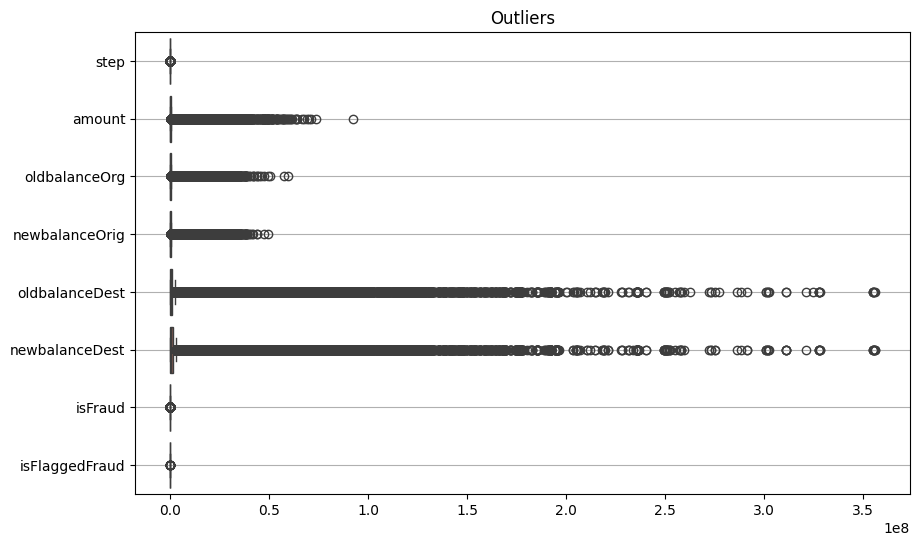

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h') # horizontal
plt.title('Outliers')
plt.grid(axis='y')
plt.show()

Analysis and exploration of categories of the "type" feature

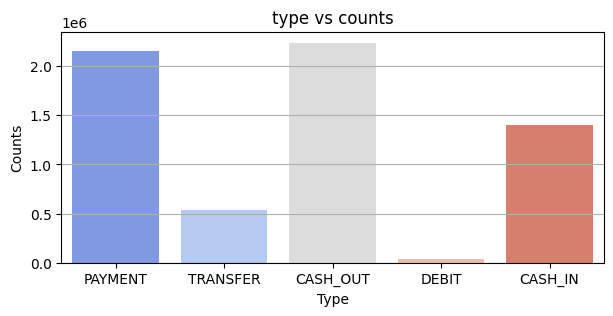

In [8]:
data['type'].unique()
plt.figure(figsize=(7,3))
plt.title('type vs counts')
sns.countplot(data=data,x='type',palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=1)
plt.show()

In [10]:
data['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)
data['type'].value_counts()

type
0    2237500
1    2151495
2    1399284
3     532909
4      41432
Name: count, dtype: int64

In [11]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


 ⚑ Dropping unnecessary features

In [14]:
# check labels in "isFraud" feature
data['isFraud'].unique()
data['isFraud'].value_counts()
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
data.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.012627,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.012627,1.000000,0.198987,0.260418,0.270669,0.066255,0.079111,0.016171,0.003144
amount,0.022373,0.198987,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,0.260418,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,0.270669,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.066255,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.079111,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.016171,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.003144,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


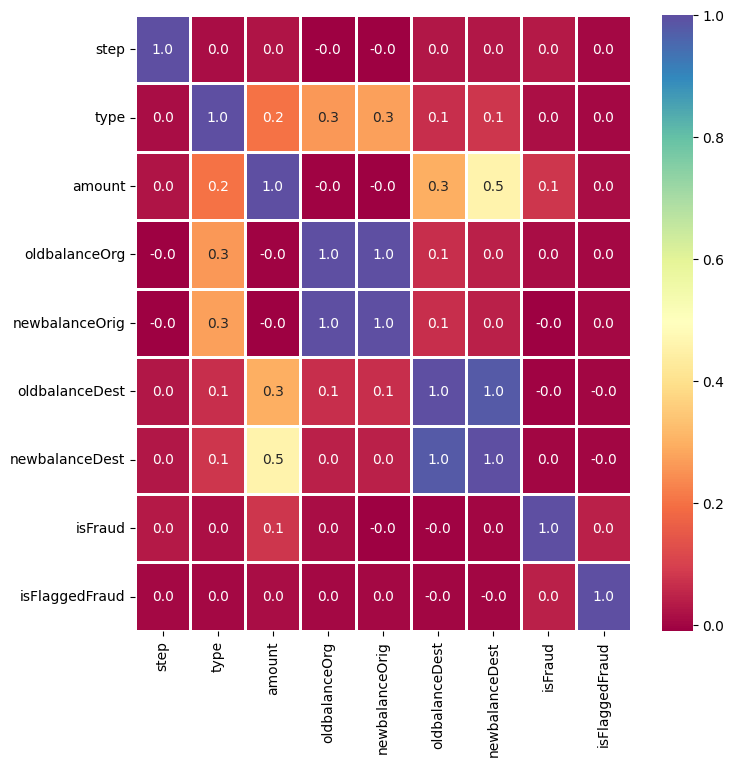

In [15]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=0.9, fmt=".1f", cmap='Spectral')
plt.show()

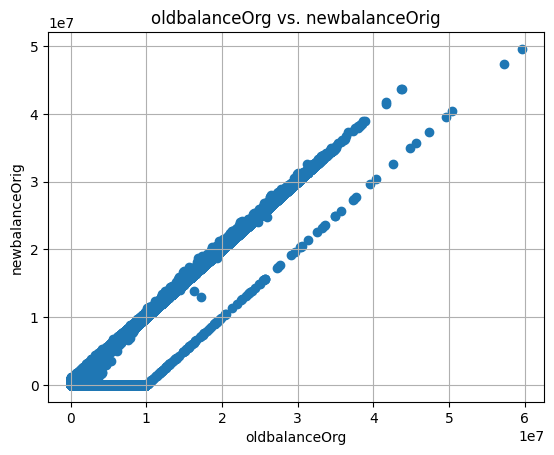

In [16]:
plt.scatter(data['oldbalanceOrg'], data['newbalanceOrig'], label='Data')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.title('oldbalanceOrg vs. newbalanceOrig')
plt.grid(True)
plt.show()

In [17]:
data.drop(['isFlaggedFraud', 'step'], axis=1, inplace=True)

⚑ Splitting the data and target

In [18]:
# X Data
X = data.drop(['isFraud'], axis=1)
print('X shape is : ' , X.shape)
print()

# y Data
y = data['isFraud']
print('y shape is : ' , y.shape)

X shape is :  (6362620, 6)

y shape is :  (6362620,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4453834, 6)
X_test shape is  (1908786, 6)
y_train shape is  (4453834,)
y_test shape is  (1908786,)


In [20]:
# Standardization (Z-Score Normalization) 
# StandardScaler for Data

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
Model_LR = LogisticRegression()
Model_LR.fit(X_train_scaled, y_train)
y_pred_LR = Model_LR.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_LR.score(X_train_scaled, y_train)
Test_Accuracy = Model_LR.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.92 %
Testing accuracy: 99.92 %


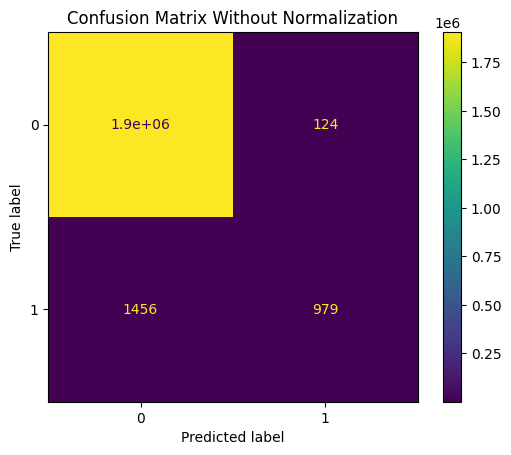

In [22]:
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_LR)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [24]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.89      0.40      0.55      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.70      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786



In [25]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f'➤➤➤ Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_pred_LR)
print(f'➤➤➤ Precision Score : {Precision_LR * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_pred_LR)
print(f'➤➤➤ Recall Score : {Recall_LR * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_pred_LR)
print(f'➤➤➤ F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred_LR)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.92 %

➤➤➤ Precision Score :  88.76 %

➤➤➤ Recall Score :  40.21 %

➤➤➤ F1 Score :  55.34 %

➤➤➤ AUC_ROC :  70.10 %



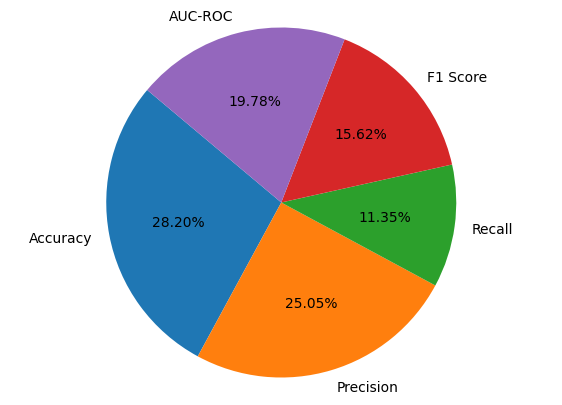

In [26]:
Scores = [Accuracy_LR, Precision_LR, Recall_LR, F1_Score_LR, ROC_AUC_LR]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

In [27]:
Model_DT = DecisionTreeClassifier()
Model_DT.fit(X_train_scaled, y_train)
y_pred_DT = Model_DT.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_DT.score(X_train_scaled, y_train)
Test_Accuracy = Model_DT.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 100.00 %
Testing accuracy: 99.97 %


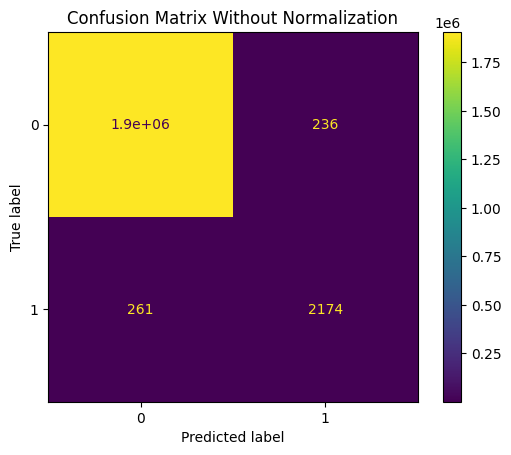

In [28]:
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_DT)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [29]:
print(classification_report(y_test, y_pred_DT))
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'➤➤➤ Accuracy Score : {Accuracy_DT * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_DT = precision_score(y_test, y_pred_DT)
print(f'➤➤➤ Precision Score : {Precision_DT * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_DT = recall_score(y_test, y_pred_DT)
print(f'➤➤➤ Recall Score : {Recall_DT * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_DT = f1_score(y_test, y_pred_DT)
print(f'➤➤➤ F1 Score : {F1_Score_DT * 100 : .2f} %\n')


ROC_AUC_DT = roc_auc_score(y_test, y_pred_DT)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_DT * 100 : .2f} %\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.90      0.89      0.90      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.95      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786

➤➤➤ Accuracy Score :  99.97 %

➤➤➤ Precision Score :  90.21 %

➤➤➤ Recall Score :  89.28 %

➤➤➤ F1 Score :  89.74 %

➤➤➤ AUC_ROC :  94.63 %



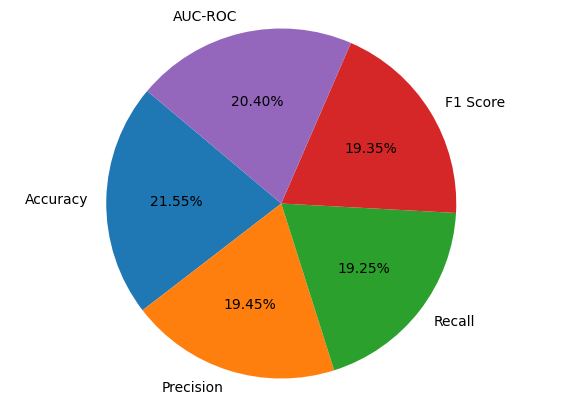

Training accuracy: 99.17 %
Testing accuracy: 99.17 %


In [30]:
Scores = [Accuracy_DT, Precision_DT, Recall_DT, F1_Score_DT, ROC_AUC_DT]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()
Model_NB = GaussianNB()
Model_NB.fit(X_train_scaled, y_train)
y_pred_NB = Model_NB.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_NB.score(X_train_scaled, y_train)
Test_Accuracy = Model_NB.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

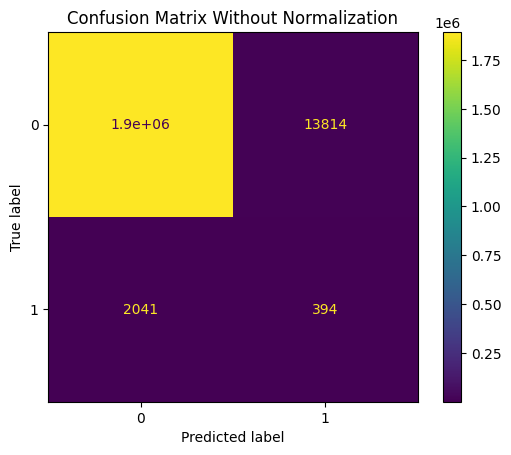

In [31]:
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_NB)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [34]:
print(classification_report(y_test, y_pred_NB))
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f'➤➤➤ Accuracy Score : {Accuracy_NB * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_NB = precision_score(y_test, y_pred_NB)
print(f'➤➤➤ Precision Score : {Precision_NB * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_NB = recall_score(y_test, y_pred_NB)
print(f'➤➤➤ Recall Score : {Recall_NB * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_NB = f1_score(y_test, y_pred_NB)
print(f'➤➤➤ F1 Score : {F1_Score_NB * 100 : .2f} %\n')


ROC_AUC_NB = roc_auc_score(y_test, y_pred_NB)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_NB * 100 : .2f} %\n')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906351
           1       0.03      0.16      0.05      2435

    accuracy                           0.99   1908786
   macro avg       0.51      0.58      0.52   1908786
weighted avg       1.00      0.99      0.99   1908786

➤➤➤ Accuracy Score :  99.17 %

➤➤➤ Precision Score :  2.77 %

➤➤➤ Recall Score :  16.18 %

➤➤➤ F1 Score :  4.73 %

➤➤➤ AUC_ROC :  57.73 %



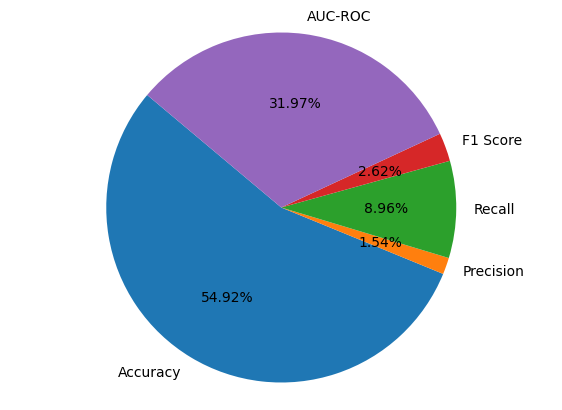

In [35]:
Scores = [Accuracy_NB, Precision_NB, Recall_NB, F1_Score_NB, ROC_AUC_NB]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

In [36]:
evaluation = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree', 'Naive Bayes'],
                           'Accuracy': [(Accuracy_LR*100), (Accuracy_DT*100), (Accuracy_NB*100)]})

evaluation

,Model,Accuracy
0,Logistic Regression,99.917225
1,Decision Tree,99.973963
2,Naive Bayes,99.169367
